In [1]:
#LETS WORK WITH CIFAR 10 DATA 

#ABOUT CIFAR 10 

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

#How to get Images 

 we have  a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

 

In [2]:
#STEP 1 : LOAD CIFAR 10 DATA
import os
os.path.abspath(os.getcwd())

'/content'

In [3]:
#SECTION1 REQUIRED LIBRARY 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np



In [4]:
%rm -r /content/SWAG_DNN

rm: cannot remove '/content/SWAG_DNN': No such file or directory


In [5]:

!git clone https://github.com/jitendramishra1024/SWAG_DNN.git
%cd SWAG_DNN

Cloning into 'SWAG_DNN'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 57 (delta 23), reused 38 (delta 10), pack-reused 0
Unpacking objects: 100% (57/57), done.
/content/SWAG_DNN


In [6]:
from SWAG_DNN.utils import Dataloader 
from SWAG_DNN.utils import show_images
from SWAG_DNN.utils import classcount
from SWAG_DNN.utils import perClassResult
from SWAG_DNN.utils import plot_misclassified_image
from SWAG_DNN.utils import useful_utils
from SWAG_DNN.models import BasicModel
from SWAG_DNN.models import RESNET
from SWAG_DNN.trainer import train
from SWAG_DNN.trainer import test

In [7]:
#DOWNLOAD THE IMAGES 

class Args:

    # Data Loading
    # ============

    # train_batch_size = 64
    # val_batch_size = 64
    num_workers = 4
    batch_size = 128


    # Regularization
    # ==============
    #dropout = 0.1
    dropout = 0

    # Training
    # ========
    random_seed = 1
    epochs = 15
    learning_rate = 0.01
    momentum = 0.9


In [8]:
#get mean and standard deviation of images 
import torchvision
import torchvision.transforms as transforms
import torch
trainset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = Dataloader.calculate_mean_std(trainset)

# mean =[0.5,0.5,0.5]
# std =[0.5,0.5,0.5]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [9]:
import torchvision
import torchvision.transforms as transforms
import torch
trainloader,testloader=Dataloader.train_test_loader(Args.batch_size,Args.num_workers)
classes = Dataloader.get_classes()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

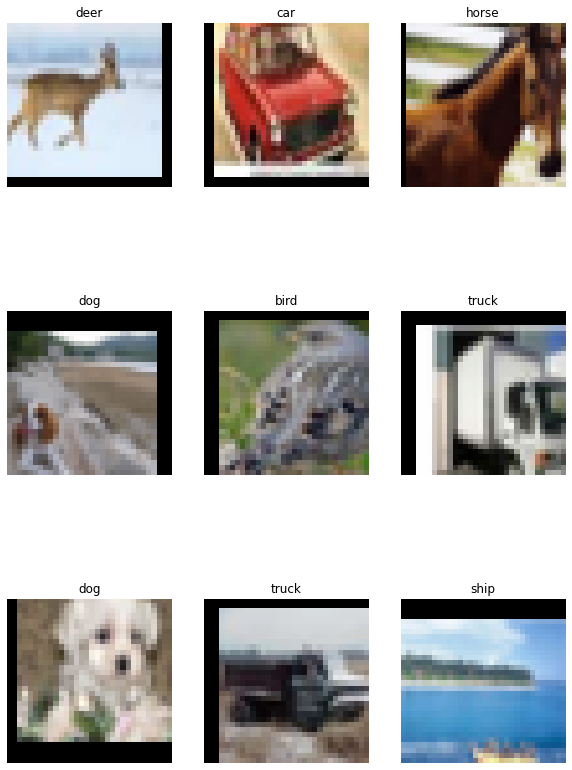

In [10]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='raw')


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

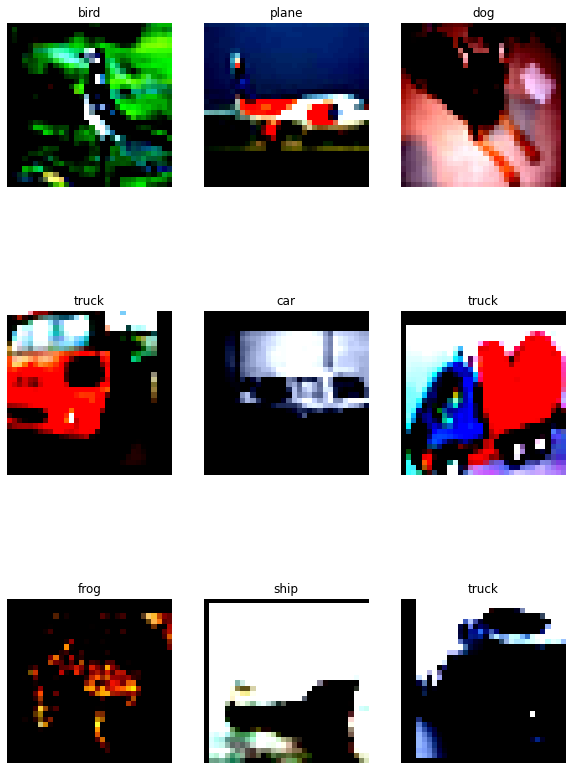

In [11]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [12]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = classcount.get_train_class_count(dataset,classes)
print(class_count)

Files already downloaded and verified
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#working 
#model = BasicModel.Net().to(device)


model = RESNET.ResNet18().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [14]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
#criterion = nn.CrossEntropyLoss()
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [15]:
#Test
EPOCHS = 30

trainer = train.Trainer()
tester  = test.Tester()
lambda_l1=0
for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1, "last LR=",scheduler.get_last_lr(), "CURRENT LR = ", scheduler.get_lr())
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, lambda_l1)
  scheduler.step()
  tester.test(model, device, testloader)



test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 last LR= [0.01] CURRENT LR =  [0.01]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train set: Loss=0.8784561157226562 Batch_id=390 Accuracy=46.49: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.5480, Test Accuracy: 5632/10000 (56.32%)

EPOCH: 2 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.6563222408294678 Batch_id=390 Accuracy=65.54: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6149, Test Accuracy: 6944/10000 (69.44%)

EPOCH: 3 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.633709192276001 Batch_id=390 Accuracy=74.12: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.8339, Test Accuracy: 7524/10000 (75.24%)

EPOCH: 4 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5593428611755371 Batch_id=390 Accuracy=78.84: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.2041, Test Accuracy: 7972/10000 (79.72%)

EPOCH: 5 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5785903930664062 Batch_id=390 Accuracy=81.50: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.2329, Test Accuracy: 8243/10000 (82.43%)

EPOCH: 6 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.3764731287956238 Batch_id=390 Accuracy=83.80: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.4590, Test Accuracy: 7933/10000 (79.33%)

EPOCH: 7 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.6520287990570068 Batch_id=390 Accuracy=85.15: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.7927, Test Accuracy: 8216/10000 (82.16%)

EPOCH: 8 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.3402712941169739 Batch_id=390 Accuracy=86.44: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.0872, Test Accuracy: 8262/10000 (82.62%)

EPOCH: 9 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.48658666014671326 Batch_id=390 Accuracy=87.45: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.7894, Test Accuracy: 8642/10000 (86.42%)

EPOCH: 10 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5034459233283997 Batch_id=390 Accuracy=88.53: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.2010, Test Accuracy: 8400/10000 (84.00%)

EPOCH: 11 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.3906874358654022 Batch_id=390 Accuracy=89.19: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.0720, Test Accuracy: 8553/10000 (85.53%)

EPOCH: 12 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.35667234659194946 Batch_id=390 Accuracy=90.10: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.2604, Test Accuracy: 8651/10000 (86.51%)

EPOCH: 13 last LR= [0.001] CURRENT LR =  [0.0001]


Train set: Loss=0.2068769484758377 Batch_id=390 Accuracy=93.32: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.4320, Test Accuracy: 9048/10000 (90.48%)

EPOCH: 14 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.19722039997577667 Batch_id=390 Accuracy=94.27: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5448, Test Accuracy: 9091/10000 (90.91%)

EPOCH: 15 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.2771379351615906 Batch_id=390 Accuracy=94.72: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5963, Test Accuracy: 9106/10000 (91.06%)

EPOCH: 16 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.11252691596746445 Batch_id=390 Accuracy=94.95: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.8193, Test Accuracy: 9092/10000 (90.92%)

EPOCH: 17 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.16239266097545624 Batch_id=390 Accuracy=95.27: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.0665, Test Accuracy: 9094/10000 (90.94%)

EPOCH: 18 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.222132608294487 Batch_id=390 Accuracy=95.47: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.0661, Test Accuracy: 9099/10000 (90.99%)

EPOCH: 19 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.14766080677509308 Batch_id=390 Accuracy=95.72: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.3105, Test Accuracy: 9106/10000 (91.06%)

EPOCH: 20 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.15477418899536133 Batch_id=390 Accuracy=95.89: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4007, Test Accuracy: 9127/10000 (91.27%)

EPOCH: 21 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.28271228075027466 Batch_id=390 Accuracy=96.06: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4853, Test Accuracy: 9121/10000 (91.21%)

EPOCH: 22 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.131927028298378 Batch_id=390 Accuracy=96.21: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.6499, Test Accuracy: 9101/10000 (91.01%)

EPOCH: 23 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.1753884255886078 Batch_id=390 Accuracy=96.44: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.6871, Test Accuracy: 9093/10000 (90.93%)

EPOCH: 24 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.08283970504999161 Batch_id=390 Accuracy=96.61: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.7649, Test Accuracy: 9117/10000 (91.17%)

EPOCH: 25 last LR= [0.0001] CURRENT LR =  [1e-05]


Train set: Loss=0.04492730647325516 Batch_id=390 Accuracy=96.94: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8990, Test Accuracy: 9138/10000 (91.38%)

EPOCH: 26 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.06745164096355438 Batch_id=390 Accuracy=96.99: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8527, Test Accuracy: 9135/10000 (91.35%)

EPOCH: 27 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.10692296922206879 Batch_id=390 Accuracy=97.06: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9602, Test Accuracy: 9139/10000 (91.39%)

EPOCH: 28 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.1303226351737976 Batch_id=390 Accuracy=97.19: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9574, Test Accuracy: 9138/10000 (91.38%)

EPOCH: 29 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.0500151589512825 Batch_id=390 Accuracy=97.17: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9761, Test Accuracy: 9141/10000 (91.41%)

EPOCH: 30 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.1409381777048111 Batch_id=390 Accuracy=97.17: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]



Test set: Average loss: -12.9310, Test Accuracy: 9148/10000 (91.48%)



In [16]:
new_train_acc,new_train_loss=useful_utils.modify_train_loss_accuracy_from_batch_level_to_epoch_level(train_acc,train_losses,trainloader)

train_acc_mod=new_train_acc
train_losses_mod=new_train_loss
len(train_acc_mod),len(train_losses_mod),len(new_train_loss)

(30, 30, 30)

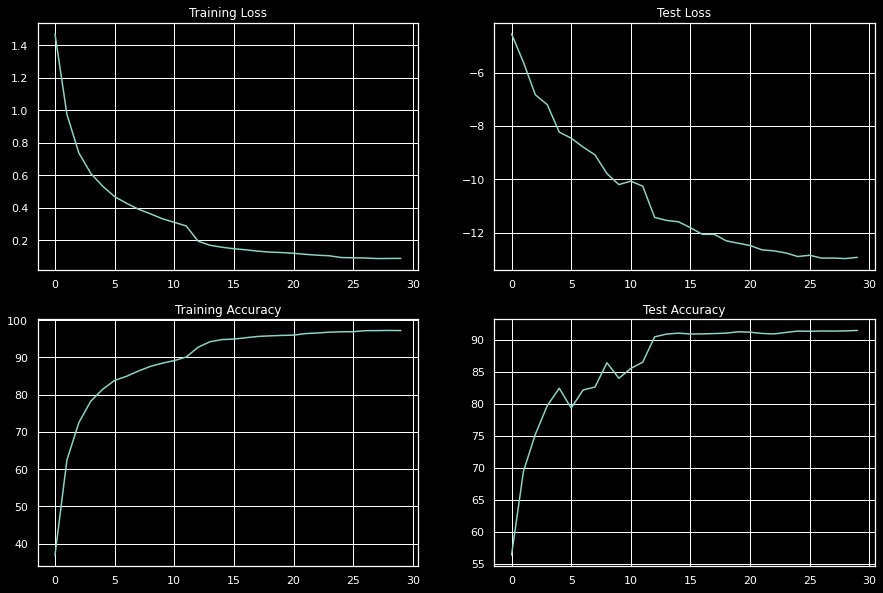

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("dark_background")

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_mod)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_mod)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()

In [18]:

torch.save(model,'./data/cifar')


In [19]:
#load the model
model = torch.load('./data/cifar')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [20]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 88 %
Accuracy of   cat : 77 %
Accuracy of  deer : 87 %
Accuracy of   dog : 88 %
Accuracy of  frog : 90 %
Accuracy of horse : 100 %
Accuracy of  ship : 94 %
Accuracy of truck : 100 %


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

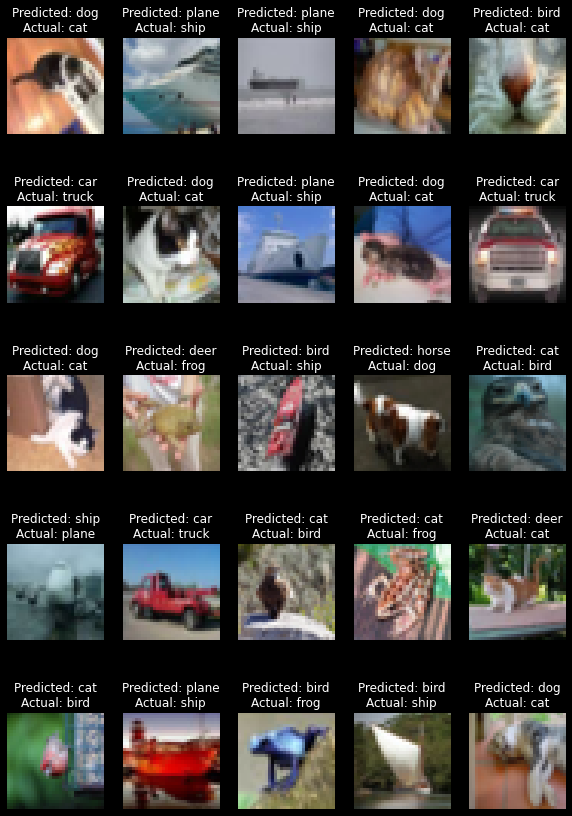

In [21]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes,mean,std,format='raw')

In [22]:
len(train_acc),len(train_losses)

(11730, 11730)